In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Geometry import Point2D
from IPython.display import SVG  # For displaying SVG directly in Jupyter notebooks

# Function to label bond indices on a molecule
def label_bonds(mol):
    # Generate 2D coordinates for visualization
    Chem.rdDepictor.Compute2DCoords(mol)

    # Define image size and initialize an SVG drawer
    drawer = Draw.MolDraw2DSVG(300, 300)

    # Draw the molecule first
    drawer.DrawMolecule(mol)

    # Add bond numbers in red
    for bond in mol.GetBonds():
        idx = bond.GetIdx()
        begin_atom_pos = mol.GetConformer().GetAtomPosition(bond.GetBeginAtomIdx())
        end_atom_pos = mol.GetConformer().GetAtomPosition(bond.GetEndAtomIdx())

        # Calculate midpoint of bond
        mid_x = (begin_atom_pos.x + end_atom_pos.x) / 2
        mid_y = (begin_atom_pos.y + end_atom_pos.y) / 2

        # Offset the y coordinate to move the label just above the bond
        offset_y = 0.1  # Adjust this value to control how far above the bond the label is
        mid_point = Point2D(mid_x, mid_y + offset_y)

        # Set label color to red and add bond index at the offset midpoint
        drawer.SetColour((1.0, 0.0, 0.0))  # Red color (R, G, B)
        drawer.DrawString(str(idx), mid_point)

    # Finish drawing
    drawer.FinishDrawing()

    # Get the SVG text
    svg = drawer.GetDrawingText()

    # Display the SVG image (if you're in a Jupyter notebook)
    display(SVG(svg))

    # Save the SVG to a file (optional)
    with open("molecule_with_bond_numbers.svg", "w") as f:
        f.write(svg)

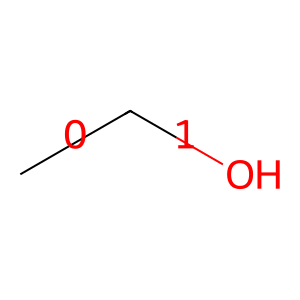

In [2]:

# Create a molecule from SMILES
mol = Chem.MolFromSmiles('CCO')
label_bonds(mol)

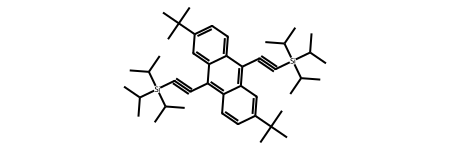

In [6]:
n1 = "CC(C)[Si](C#Cc1c2ccc(C(C)(C)C)cc2c(C#C[Si](C(C)C)(C(C)C)C(C)C)c2ccc(C(C)(C)C)cc12)(C(C)C)C(C)C"
n1_mol = Chem.MolFromSmiles(n1, sanitize=False)
n1_mol

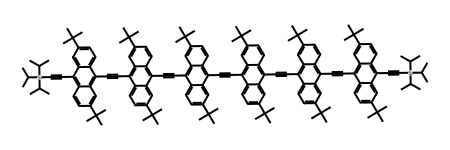

In [7]:
n6 = "CC(C)[Si](C#Cc1c2ccc(C(C)(C)C)cc2c(C#Cc2c3ccc(C(C)(C)C)cc3c(C#Cc3c4ccc(C(C)(C)C)cc4c(C#Cc4c5ccc(C(C)(C)C)cc5c(C#Cc5c6ccc(C(C)(C)C)cc6c(C#Cc6c7ccc(C(C)(C)C)cc7c(C#C[Si](C(C)C)(C(C)C)C(C)C)c7ccc(C(C)(C)C)cc67)c6ccc(C(C)(C)C)cc56)c5ccc(C(C)(C)C)cc45)c4ccc(C(C)(C)C)cc34)c3ccc(C(C)(C)C)cc23)c2ccc(C(C)(C)C)cc12)(C(C)C)C(C)C"
n6_mol = Chem.MolFromSmiles(n6)
n6_mol